# Assignment 3. Introduction to Model Training

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For your questions refer to @danialayati on Telegram*

### Description  
This homework consists of five questions, each aimed at one skill you are supposed to learn and get comfortable with during the course.  
1. You are supposed to perform an observational study based on **propensity score matching**, as you learned during the course.  
   
2. Briefly introduces you to the usage of sklearn library as well as the very basics of word vectorization.  
   
3. Part 3 and 4 are aimed at getting you familiarized with workflow of regression and classification tasks.  
   
4. For bonus part, you should get familiarized with the basics of PyTorch.   

### Information  
Complete the information box below.

In [1]:
full_name = 'Ilia Hashemi Rad'
student_id = '99102456'

## 1 Propensity score matching

In this exercise, you will apply propensity score matching that was discussed the lecture ("Observational studies"), in order to draw conclusions from an observational study. [(a reference that could help if you are interested in the concept)](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), 

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](https://www.jstor.org/stable/1806062)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.



### 1.1 A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups using plots, such as histograms, and other statistical measures, such as mean, median, variance, and standard deviation.

To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?



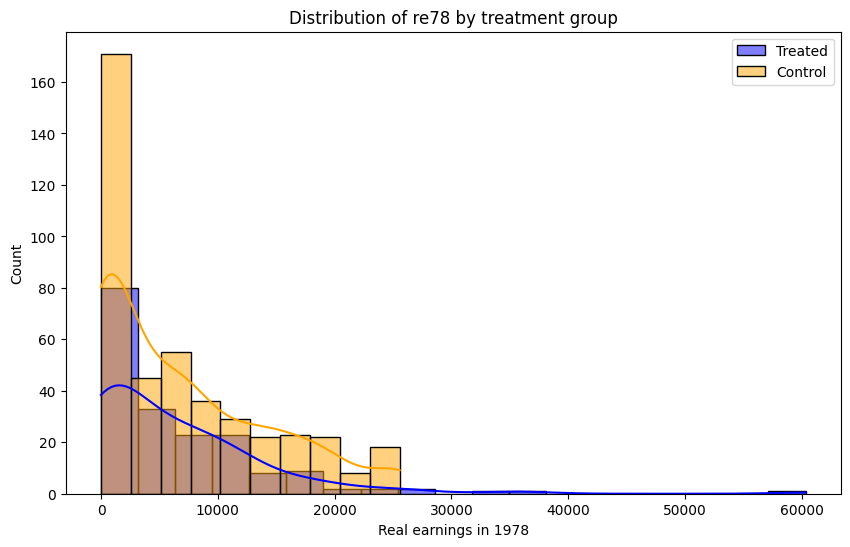

Summary statistics for treated group:
count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

Summary statistics for control group:
count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv("lalonde.csv")

# Separate the data by treatment group
treated = df[df["treat"] == 1]
control = df[df["treat"] == 0]

# Plot the histograms of re78 for each group
plt.figure(figsize=(10, 6))
sns.histplot(treated["re78"], color="blue", label="Treated", kde=True)
sns.histplot(control["re78"], color="orange", label="Control", kde=True)
plt.xlabel("Real earnings in 1978")
plt.ylabel("Count")
plt.title("Distribution of re78 by treatment group")
plt.legend()
plt.show()


# Calculate the summary statistics for each group
treated_stats = treated["re78"].describe()
control_stats = control["re78"].describe()

# Print the summary statistics
print("Summary statistics for treated group:")
print(treated_stats)
print("\nSummary statistics for control group:")
print(control_stats)



A naive "researcher" might conclude that the job training program had a **negative** effect on the real earnings of the participants, based on the following observations:

- The mean and median of `re78` are **lower** for the treated group than the control group, suggesting that the treated group earned less on average than the control group in 1978.
- The variance and standard deviation of `re78` are **higher** for the treated group than the control group, indicating that the treated group had more variation and uncertainty in their earnings than the control group in 1978.
- The maximum of `re78` is **higher** for the treated group than the control group, but this is likely due to an outlier, as the 75th percentile of `re78` is **lower** for the treated group than the control group, implying that most of the treated group had lower earnings than most of the control group in 1978.

However, this conclusion would be **misleading** and **invalid**, as it does not account for the following factors:

- The difference in the sample size between the two groups, which could affect the accuracy and reliability of the summary statistics.
- The difference in the pre-treatment characteristics between the two groups, such as age, education, race, marital status, and previous earnings, which could confound the effect of the treatment on the outcome.
- The difference in the distribution of `re78` between the two groups, which could violate the assumptions of the statistical tests and methods used to compare the means and variances of the two groups.

Therefore, a naive "researcher" should not draw any conclusions from this superficial analysis, but rather use more appropriate methods to estimate the causal effect of the job training program on the real earnings of the participants, such as matching, regression, or propensity score methods.

### 1.2 A closer look at the data

You're not naive, of course, so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.


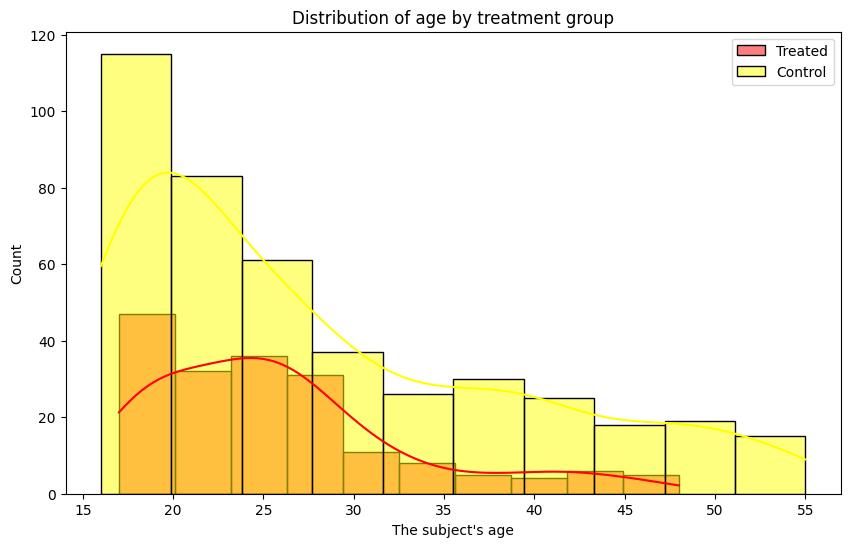

Summary statistics of age for treated group:
count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64

Summary statistics of age for control group:
count    429.000000
mean      28.030303
std       10.786653
min       16.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64


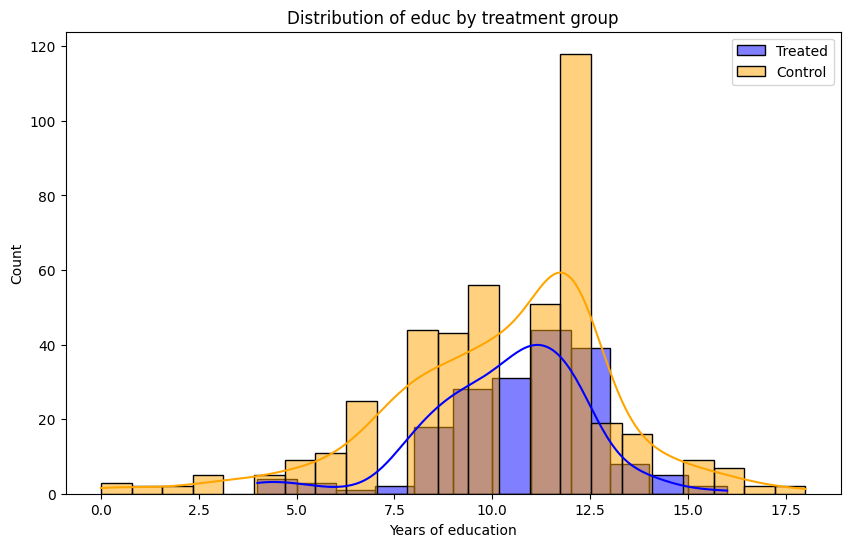

Summary statistics of eduacation for treated group:
count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64

Summary statistics of education for control group:
count    429.000000
mean      10.235431
std        2.855238
min        0.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       18.000000
Name: educ, dtype: float64


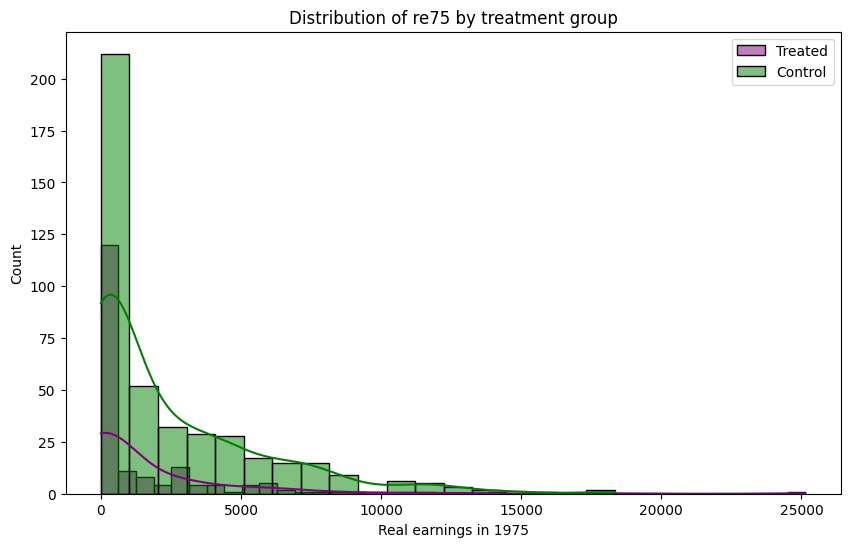

Summary statistics of real earnings in 1975 for treated group:
count      185.000000
mean      1532.055314
std       3219.250870
min          0.000000
25%          0.000000
50%          0.000000
75%       1817.284000
max      25142.240000
Name: re75, dtype: float64

Summary statistics of real earnings in 1975 for control group:
count      429.000000
mean      2466.484443
std       3291.996183
min          0.000000
25%          0.000000
50%       1086.726000
75%       3881.419000
max      18347.230000
Name: re75, dtype: float64


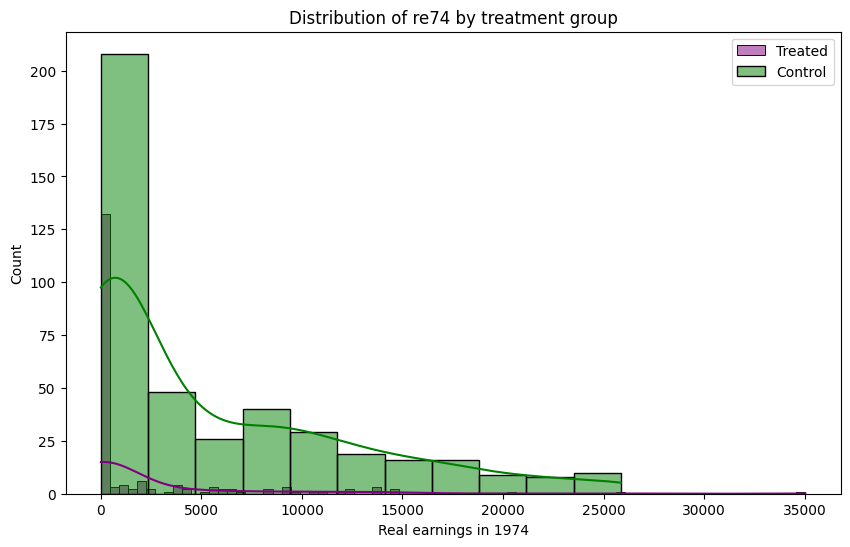

Summary statistics of real earnings in 1974 for treated group:
count      185.000000
mean      2095.573689
std       4886.620353
min          0.000000
25%          0.000000
50%          0.000000
75%       1291.468000
max      35040.070000
Name: re74, dtype: float64

Summary statistics of real earnings in 1974 for control group:
count      429.000000
mean      5619.236506
std       6788.750796
min          0.000000
25%          0.000000
50%       2547.047000
75%       9277.128000
max      25862.320000
Name: re74, dtype: float64


In [3]:
# Plot the histograms of age for each group
plt.figure(figsize=(10, 6))
sns.histplot(treated["age"], color="red", label="Treated", kde=True)
sns.histplot(control["age"], color="yellow", label="Control", kde=True)
plt.xlabel("The subject's age")
plt.ylabel("Count")
plt.title("Distribution of age by treatment group")
plt.legend()
plt.show()


# Calculate the summary statistics for each group
treated_stats = treated["age"].describe()
control_stats = control["age"].describe()

# Print the summary statistics
print("Summary statistics of age for treated group:")
print(treated_stats)
print("\nSummary statistics of age for control group:")
print(control_stats)



# Plot the histograms of educ for each group
plt.figure(figsize=(10, 6))
sns.histplot(treated["educ"], color="blue", label="Treated", kde=True)
sns.histplot(control["educ"], color="orange", label="Control", kde=True)
plt.xlabel("Years of education")
plt.ylabel("Count")
plt.title("Distribution of educ by treatment group")
plt.legend()
plt.show()


# Calculate the summary statistics for each group
treated_stats = treated["educ"].describe()
control_stats = control["educ"].describe()

# Print the summary statistics
print("Summary statistics of eduacation for treated group:")
print(treated_stats)
print("\nSummary statistics of education for control group:")
print(control_stats)


# Plot the histograms of re75 for each group
plt.figure(figsize=(10, 6))
sns.histplot(treated["re75"], color="purple", label="Treated", kde=True)
sns.histplot(control["re75"], color="green", label="Control", kde=True)
plt.xlabel("Real earnings in 1975")
plt.ylabel("Count")
plt.title("Distribution of re75 by treatment group")
plt.legend()
plt.show()


# Calculate the summary statistics for each group
treated_stats = treated["re75"].describe()
control_stats = control["re75"].describe()

# Print the summary statistics
print("Summary statistics of real earnings in 1975 for treated group:")
print(treated_stats)
print("\nSummary statistics of real earnings in 1975 for control group:")
print(control_stats)


# Plot the histograms of re74 for each group
plt.figure(figsize=(10, 6))
sns.histplot(treated["re74"], color="purple", label="Treated", kde=True)
sns.histplot(control["re74"], color="green", label="Control", kde=True)
plt.xlabel("Real earnings in 1974")
plt.ylabel("Count")
plt.title("Distribution of re74 by treatment group")
plt.legend()
plt.show()


# Calculate the summary statistics for each group
treated_stats = treated["re74"].describe()
control_stats = control["re74"].describe()

# Print the summary statistics
print("Summary statistics of real earnings in 1974 for treated group:")
print(treated_stats)
print("\nSummary statistics of real earnings in 1974 for control group:")
print(control_stats)


- For the real earnings in 1975 (`re75`), both groups have a similar variance, minimum, and 25th percentile, which are all zero. This means that a large proportion of both groups had no earnings in 1975, before the treatment. However, the treated group has a lower mean, median, 50th and 75th percentile, indicating that the treated group had lower earnings on average in their earnings than the control group in 1975. This suggests that the treated group was more disadvantaged and had lower earnings such that the 50th percentile for them was zero indicating a much less income already before treatment and the fact that after treatment they have lower earnings may be affected from that.

- The same is true for the real earnings in 1974 (`re74`), but with a much higher differences between two groups in the superficial analysis.


- For the education (`educ`), both groups have a similar variance, mean, median, and 75th percentile, which are all around 10 or 11 years. This means that both groups had a similar level of education on average, and most of them had completed high school or equivalent. However, the treated group has a higher minimum and lower maximum than the control group, indicating that the treated group had less variation and less outliers in their education than the control group. This suggests that the treated group was more homogeneous and less diverse in their education than the control group.


- For the age (`age`), both groups have a similar median, which are around 25 years. This means that both groups had a similar age on average, and most of them were in their mid-twenties. However, the treated group has a lower mean, minimum, maximum, and standard deviation than the control group, indicating that the treated group was younger and less varied in their age than the control group. This suggests that the treated group was more likely to be in the early stages of their careers and more receptive to have lower earnings and because of that, it is kind of normal to have a lower income after treatment also.

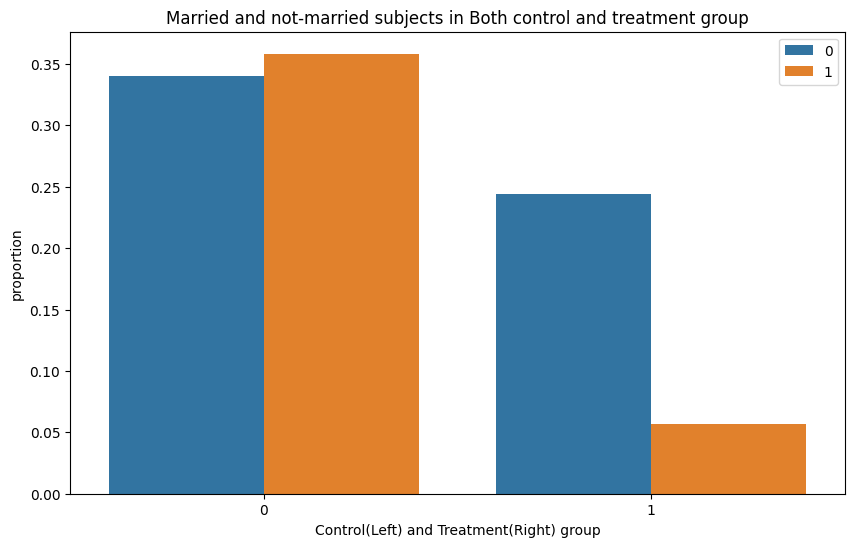

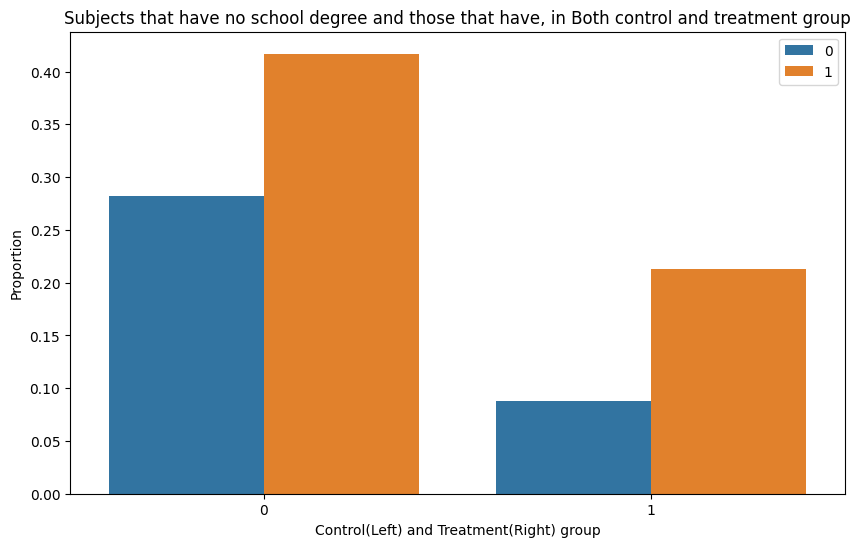

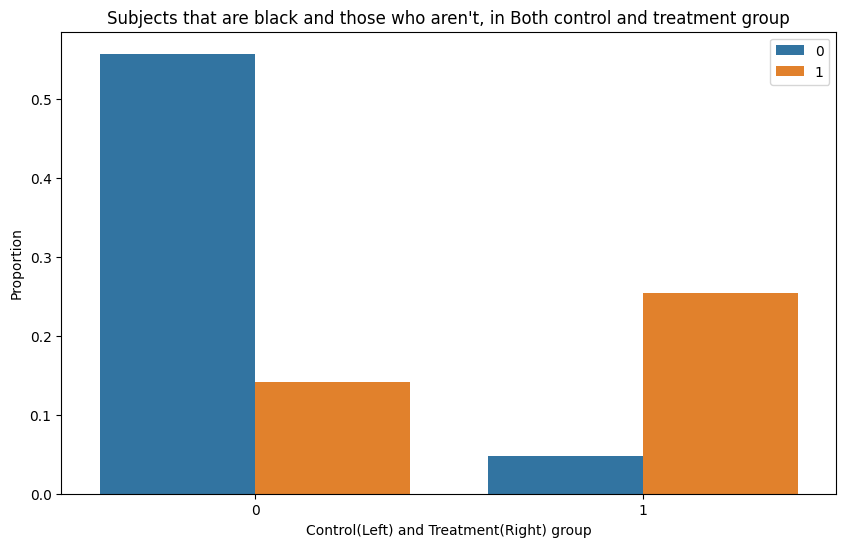

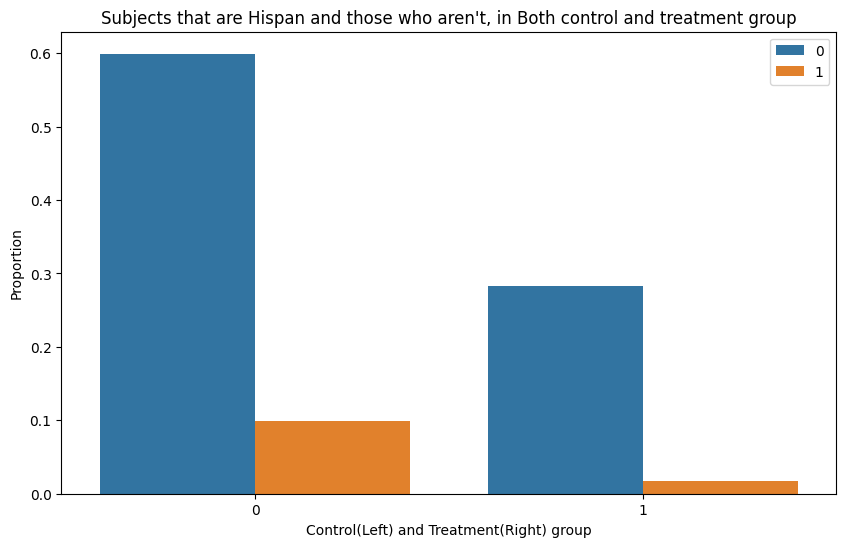

In [4]:
# Plot the countplot of married by treatment group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="treat", hue='married', stat='proportion')
plt.xlabel("Control(Left) and Treatment(Right) group")
plt.ylabel("proportion")
plt.title("Married and not-married subjects in Both control and treatment group")
plt.legend()
plt.show()

# Plot the countplot of married by treatment group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="treat", hue='nodegree', stat='proportion')
plt.xlabel("Control(Left) and Treatment(Right) group")
plt.ylabel("Proportion")
plt.title("Subjects that have no school degree and those that have, in Both control and treatment group")
plt.legend()
plt.show()

# Plot the countplot of married by treatment group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="treat", hue='black', stat='proportion')
plt.xlabel("Control(Left) and Treatment(Right) group")
plt.ylabel("Proportion")
plt.title("Subjects that are black and those who aren't, in Both control and treatment group")
plt.legend()
plt.show()

# Plot the countplot of married by treatment group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="treat", hue='hispan', stat='proportion')
plt.xlabel("Control(Left) and Treatment(Right) group")
plt.ylabel("Proportion")
plt.title("Subjects that are Hispan and those who aren't, in Both control and treatment group")
plt.legend()
plt.show()


- According to the above figures, it can be easily seen that the proportion of subjects with no school degree in both groups are almost the same and similar which probably have no effect on the treatment. But, more than half of control group subjects are married, however the percent in the treatment group is 17% of the treatment subjects. This indicates that the control group subjects, because of marriage are more likely to have effort on their earnings than the treatment group. On the other hand, in the treatment group, most of them are unmarried, so may don't care about the treatment as desired and this also have a negative affect on the treatment. 


- For the age (`race`), we can see that although the portion of Hispan subjects againt all subjects of each group is approximately equal, The black people are not. as you can see, most of the treatment group are black, while the control group are white at most. This can have a significant effect on the treatment, because normally the white people according to the racism issues have more income( or can have in future years) than the black people, and the fact that the treatment group are mostly black, can result in a lower earning than the control group.


Therefore, as I said before, a naive "researcher" should not draw specific conclusions from this superficial analysis, because of the probable wrong sampling, pre-trained factors and some stuff like these. But rather, use more appropriate methods to estimate the causal effect of the job training program on the real earnings of the participants, such as matching, regression, or propensity score methods.

### 1.3 A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum.

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.  
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.)


In [5]:
from sklearn import linear_model

# Separate the data into features and target variables
feature_cols = ["age", "educ", "re74", "re75", "black", "hispan", "married", "nodegree"]
X = df[feature_cols] # Features
y = df["treat"] # Target variable

# Create a logistic regression object
logistic = linear_model.LogisticRegression(max_iter=1000)

# Fit the logistic regression to the data
logistic.fit(X, y)

# Apply the logistic regression model to each data point to obtain the propensity scores
pscores = logistic.predict_proba(X)[:, 1]


### 1.4 Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.  
(Hint: you may explore the `networkx` package in Python for predefined matching functions)  

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.  
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.  

After matching, you have as many treated as you have control subjects.  
Compare the outcomes (`re78`) between the two groups (treated and control).  

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects. What do you observe?  
Are you closer to being able to draw valid conclusions now than you were before?

### Bonus
Also, You can derive a mathematical model for this section. Your optimization problem should maximize the similarity between matched subjects, as captured by their propensity scores. In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

You don't need to implement this model and only need to write an optimization problem and proof theoretically that your model satisfies our goal.

#### Bonus part

- First, we need to define the variables and parameters of the model:

  - Let $n$ be the number of data points in the treated group, and $m$ be the number of data points in the control group.
  - Let $p_i$ be the propensity score of the $i$-th data point in the treated group, and $q_j$ be the propensity score of the $j$-th data point in the control group, for $i = 1, \dots, n$ and $j = 1, \dots, m$.
  - Let $w_{ij}$ be the weight of the edge between the $i$-th data point in the treated group and the $j$-th data point in the control group, which is equal to the absolute difference of their propensity scores, i.e., $w_{ij} = |p_i - q_j|$, for $i = 1, \dots, n$ and $j = 1, \dots, m$.
  - Let $x_{ij}$ be a binary decision variable that indicates whether the $i$-th data point in the treated group is matched with the $j$-th data point in the control group. $x_{ij} = 1$ if they are matched, and $x_{ij} = 0$ otherwise, for $i = 1, \dots, n$ and $j = 1, \dots, m$.

- Next, we need to formulate the objective function and the constraints of the model:

  - The objective function is to minimize the sum of the edge weights over all matched pairs : $\min \sum_{i=1}^n \sum_{j=1}^m w_{ij} x_{ij}$.
  - The constraints are as follows:
    - Each data point in the treated group must be matched with exactly one data point in the control group : $\sum_{j=1}^m x_{ij} = 1$, for $i = 1, \dots, n$.
    - Each data point in the control group can be matched with at most one data point in the treated group : $\sum_{i=1}^n x_{ij} \leq 1$, for $j = 1, \dots, m$.
    - The decision variables must be binary : $x_{ij} \in \{0, 1\}$, for $i = 1, \dots, n$ and $j = 1, \dots, m$.

- Finally, we need to prove theoretically that your model satisfies your goal:

  - The objective function captures the goal of maximizing the similarity between matched subjects, as captured by their propensity scores, because it minimizes the sum of the absolute differences of the propensity scores over all matched pairs, which is equivalent to minimizing the average absolute difference of the propensity scores over all matched pairs, since the number of matched pairs is fixed and equal to $n$.
  - The constraints ensure that each data point from the treated group is matched with exactly one data point from the control group, while each data point from the control group is matched with at most one data point from the treated group, which is the desired matching scheme.
  - The decision variables are binary, which reflects the fact that the matching is either done or not done between any pair of data points.

Therefore, the mathematical model is valid and satisfies the goal.

#### Outcome earning after matching

In [6]:
import pandas as pd
import networkx as nx

# Create a bipartite graph from the data
G = nx.Graph()

# Add nodes from the treated group
G.add_nodes_from(df[df["treat"] == 1].index, bipartite=0)

# Add nodes from the control group
G.add_nodes_from(df[df["treat"] == 0].index, bipartite=1)

# Add weighted edges based on the absolute difference of the propensity scores
G.add_weighted_edges_from([(i, j, abs(pscores[i] - pscores[j])) 
                           for i in df[df["treat"] == 1].index 
                           for j in df[df["treat"] == 0].index])

# Find the minimum weight matching in the bipartite graph
matching = nx.algorithms.matching.min_weight_matching(G)

# Create a new dataframe with the matched pairs
matched_df = pd.DataFrame(matching, columns=["treated", "control"])

# Add the outcome column for each group
matched_df["treated_re78"] = df["re78"][matched_df["treated"]].values
matched_df["control_re78"] = df["re78"][matched_df["control"]].values

# Compare the outcome after matching one by one
matched_df


,treated,control,treated_re78,control_re78
0,340,68,0.0000,8546.715
1,8,464,2164.0220,2136.793
2,415,101,7933.9140,9265.788
3,287,181,1687.5640,36646.950
4,142,553,1660.5080,0.000
...,...,...,...,...
180,410,66,701.9201,0.000
181,65,596,10694.2900,0.000
182,20,454,0.0000,1725.985
183,55,585,0.0000,1053.619


In [7]:
matched_treat_stats = matched_df['treated_re78'].describe()
matched_control_stats = matched_df['control_re78'].describe()

# Print the summary statistics
print("Summary statistics of real earnings in 1978 for treated group after matching:")
print(matched_treat_stats)
print("\nSummary statistics of real earnings in 1978 for control group after matching:")
print(matched_control_stats)

Summary statistics of real earnings in 1978 for treated group after matching:
count      185.000000
mean      6066.058409
std       7646.482702
min          0.000000
25%          0.000000
50%       3972.540000
75%       8957.978000
max      60307.930000
Name: treated_re78, dtype: float64

Summary statistics of real earnings in 1978 for control group after matching:
count      185.000000
mean      5829.911515
std       6245.180359
min          0.000000
25%        642.811100
50%       4112.513000
75%       9438.240000
max      36646.950000
Name: control_re78, dtype: float64


As you can see, the results changed sifnificantly comparing with the before matching case:

- For the real earnings in 1978 (`re78`), both groups have a similar count, which is equal to the number of treated subjects (185). This means that the matching process has successfully matched each treated subject with one control subject, and discarded the unmatched control subjects. However, this may also reduce the sample size and the statistical power of the analysis.
- The treated group has a higher mean and median than the control group, indicating that the treated group had higher earnings on average and in the middle than the control group in 1978. This suggests that the treatment (job training program) may have a positive effect on the earnings of the treated subjects as desired.
- However, the difference between the mean and median of the two groups is not very large, and the standard deviation of both groups is quite high, indicating that there is a lot of variation and dispersion in the earnings of both groups. This means that the effect of the treatment may not be very strong or consistent, and there may be other factors that influence the earnings of the subjects.
- Moreover, the minimum and the 25th percentile of both groups are zero, indicating that a large proportion of both groups had no earnings in 1978, regardless of the treatment. This means that the treatment may not be effective for some subjects, or that there may be some measurement errors or missing values in the data.
- The maximum and the 75th percentile of both groups are quite high, indicating that there are some outliers or extreme values in the earnings of both groups. This may skew the distribution and the mean of the groups, and make the comparison less reliable.

After comparing the results with the part1 results, we determine:

Before matching, the treated group had a much lower mean and median than the control group, indicating that the treated group had lower earnings on average and in the middle than the control group in 1978. Now, according to the above descriptions, we know that it was for the effect of some other factors but not the fail of the treatment:
- Before matching, the treated group had a much smaller count and sample size than the control group, which had made the comparison less valid and representative. Moreover, the treated and control groups had a different distributions and characteristics in the pre-treatment variables, such as age, education, race, etc., which had confounded the effect of the treatment on the outcome.
- After matching, the treated group has a slightly higher mean and median than the control group, indicating that the treated group had higher earnings on average and in the middle than the control group in 1978. This suggests that the treatment (job training program) have a positive effect on the earnings of the treated subjects, and we successfully removed the effect of confounder factors to gain a more reliable result for the treatment.
- However, after matching, the treated and control groups still have some slightly differences and variations in the earnings and the pre-treatment variables, which may affect the validity and reliability of the comparison. Moreover, the matching process may introduce some selection bias or imbalance in the sample size, as some subjects may be discarded or duplicated in the process.

Therefore, the effect of matching by propensity score on the treatment is to reduce the bias and improve the balance between the treated and control groups, by matching them based on their probability of receiving the treatment, given their pre-treatment characteristics.

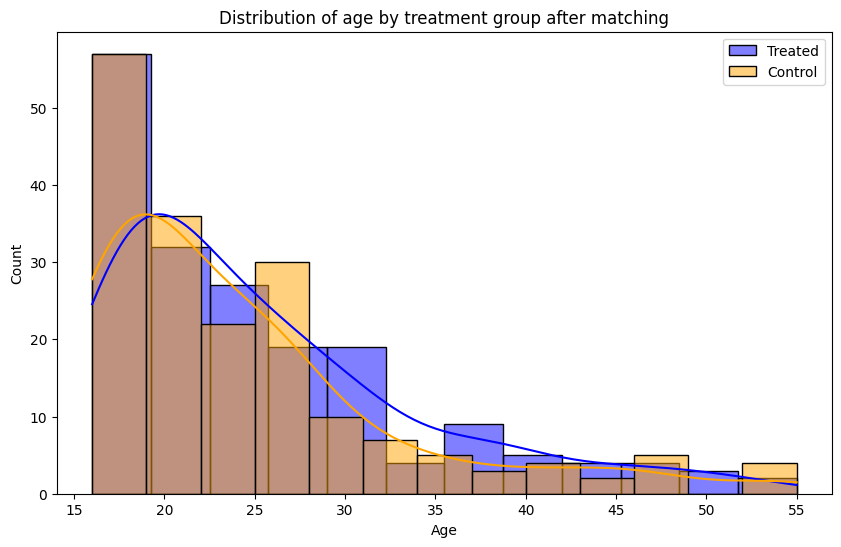

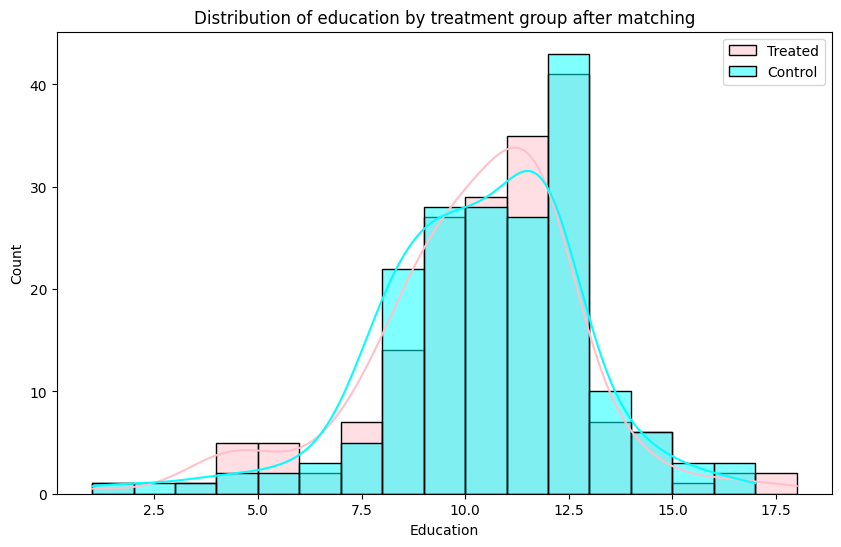

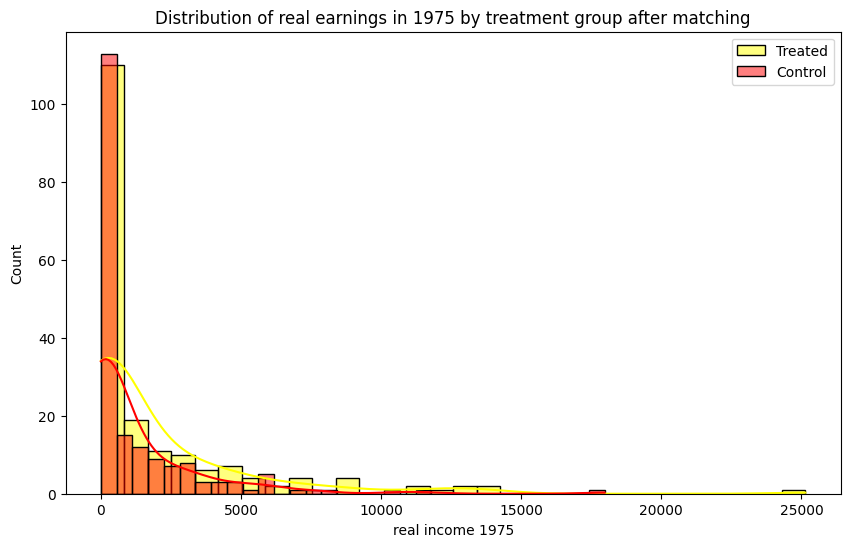

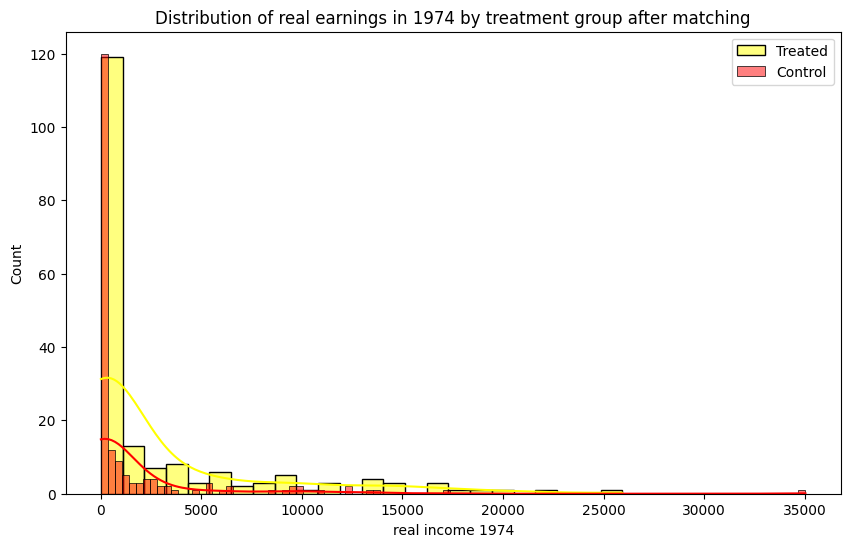

In [8]:
# Create a new dataframe with the matched pairs
matched_df = pd.DataFrame(matching, columns=["treated", "control"])

# Merge the new dataframe with the original dataframe
matched_df = pd.merge(matched_df, df, left_on="treated", right_index=True)
matched_df = pd.merge(matched_df, df, left_on="control", right_index=True, suffixes=("_t", "_c"))

# Plot the histograms of age for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["age_t"], color="blue", label="Treated", kde=True)
sns.histplot(matched_df["age_c"], color="orange", label="Control", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of age by treatment group after matching")
plt.legend()
plt.show()


# Plot the histograms of educ for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["educ_t"], color="pink", label="Treated", kde=True)
sns.histplot(matched_df["educ_c"], color="cyan", label="Control", kde=True)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Distribution of education by treatment group after matching")
plt.legend()
plt.show()


# Plot the histograms of re75 for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["re75_t"], color="yellow", label="Treated", kde=True)
sns.histplot(matched_df["re75_c"], color="red", label="Control", kde=True)
plt.xlabel("real income 1975")
plt.ylabel("Count")
plt.title("Distribution of real earnings in 1975 by treatment group after matching")
plt.legend()
plt.show()

# Plot the histograms of re74 for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["re74_t"], color="yellow", label="Treated", kde=True)
sns.histplot(matched_df["re74_c"], color="red", label="Control", kde=True)
plt.xlabel("real income 1974")
plt.ylabel("Count")
plt.title("Distribution of real earnings in 1974 by treatment group after matching")
plt.legend()
plt.show()



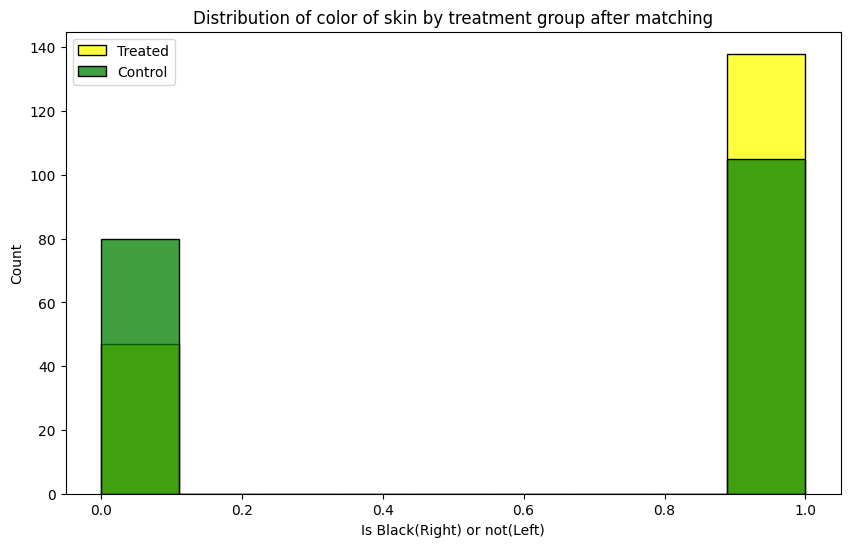

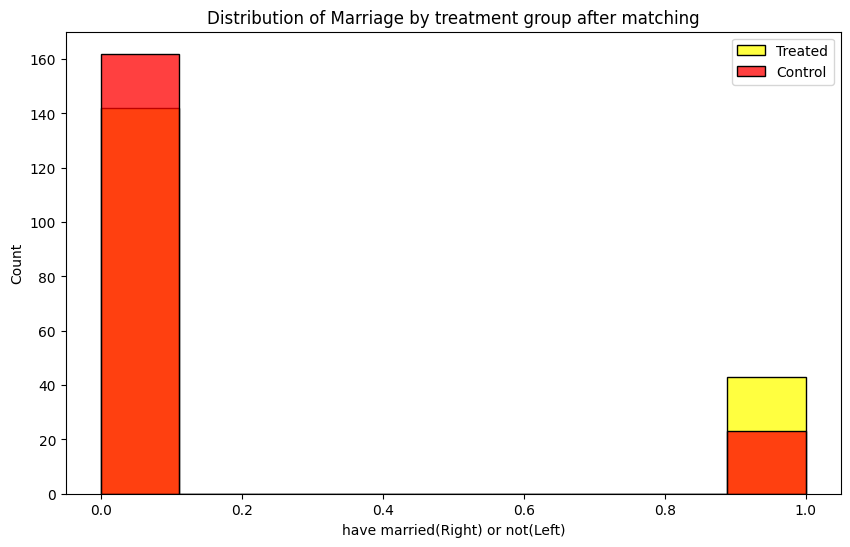

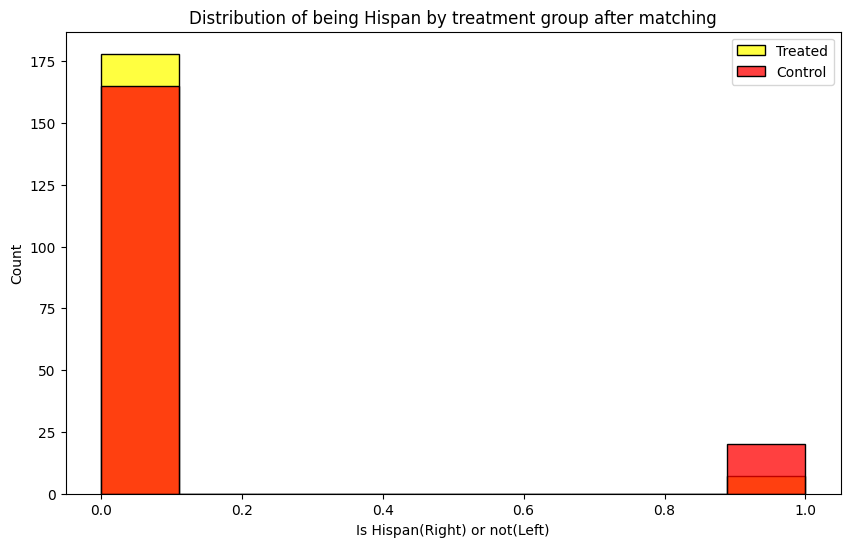

In [9]:
# Plot the histograms of age for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["black_t"], color="yellow", label="Treated")
sns.histplot(matched_df["black_c"], color="green", label="Control")
plt.xlabel("Is Black(Right) or not(Left)")
plt.ylabel("Count")
plt.title("Distribution of color of skin by treatment group after matching")
plt.legend()
plt.show()

# Plot the histograms of age for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["married_t"], color="yellow", label="Treated")
sns.histplot(matched_df["married_c"], color="red", label="Control")
plt.xlabel("have married(Right) or not(Left)")
plt.ylabel("Count")
plt.title("Distribution of Marriage by treatment group after matching")
plt.legend()
plt.show()


# Plot the histograms of age for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["hispan_t"], color="yellow", label="Treated")
sns.histplot(matched_df["hispan_c"], color="red", label="Control")
plt.xlabel("Is Hispan(Right) or not(Left)")
plt.ylabel("Count")
plt.title("Distribution of being Hispan by treatment group after matching")
plt.legend()
plt.show()

As you can see, almost all the features have a similar distribution in both groups. However, in some features, we can see a slight difference in the distribution which may still affect the results of the treatment. Some of these confounder factors haven't been matched completely between subjects of two groups, indicating the need for balancing the groups which is discussed in the next part.

Note that the histogram of `nodegree` hasn't been gone-over; because it had already had the same distribution in both groups before matching. So, it is not considered in this analysis.

### 1.5 Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?  
Would you say your dataset is sufficiently balanced?  
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?  

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.  
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.



#### Explanations:

Based on the comparison of feature-value distributions from part 4, I am not fully satisfied with the matching. Although the histograms of education, real earnngs in 1975, marriage and being Hispan look approximately similar between the two groups after matching, there are still some noticeable differences in the other features, such as age, being black, and pre-treatment income in 1974.

I would not say that the dataset is sufficiently balanced, because there are still some confounding variables that may affect the outcome of the treatment and bias the estimation of the causal effect. For example, the treated group has more black subjects and lower income in 1974 than the control group in pairs, which may reflect some social and economic factors that are not captured by the propensity scores. Also, the treated group has lower age in average than the control group, which may indicate a different level of motivation or initial income or experiences.

The "balanced" dataset that I have obtained may still not allow me to draw valid conclusions, because the matching based on the propensity scores may not account for all the relevant covariates that influence the treatment assignment and the outcome. Moreover, the matching may introduce some selection bias or imbalance in the sample size, as some subjects may be discarded or duplicated in the process. Therefore, I should use more appropriate methods to assess the balance of the matched data and the similarity of the matched subjects, such as balancing again the factors.

To improve the matching, I can explicitly make sure that I match only subjects that have the same value for the problematic feature.
As I've tested the matching after balancing with the further explained method for the three candidates for being the problematic feature (`age`, `re74` and `black`), I realized that the effect of real earnings in 1974 is more than others in the groups to be unbalance. Therefore, the `re74` feature is the most problematic feature which with fixing the balance for that, we can see a much more and a complete balanced features between two groups.

To do so, I matched only subjects that have a difference of less than 200 units in 1974 income, by adding a condition to the matching function that checks if the age of the treated and control subjects have the desired difference. Here is the code and the corresponding results:


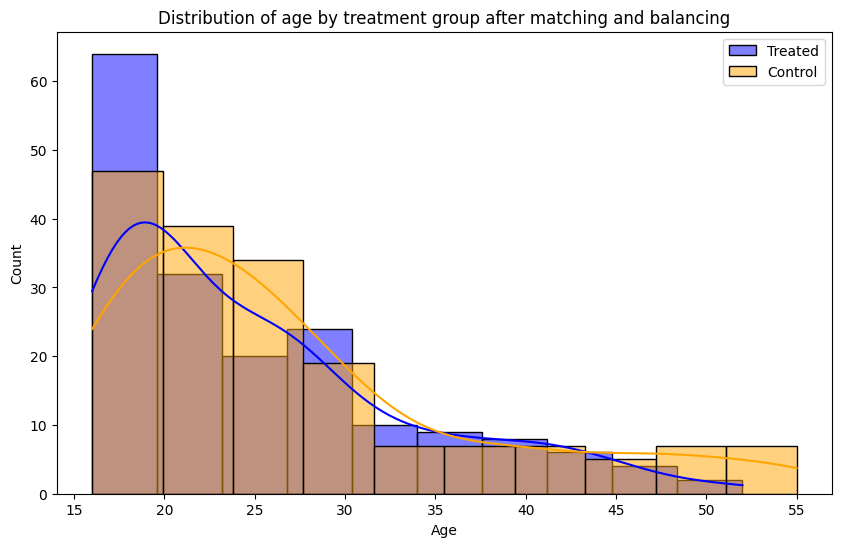

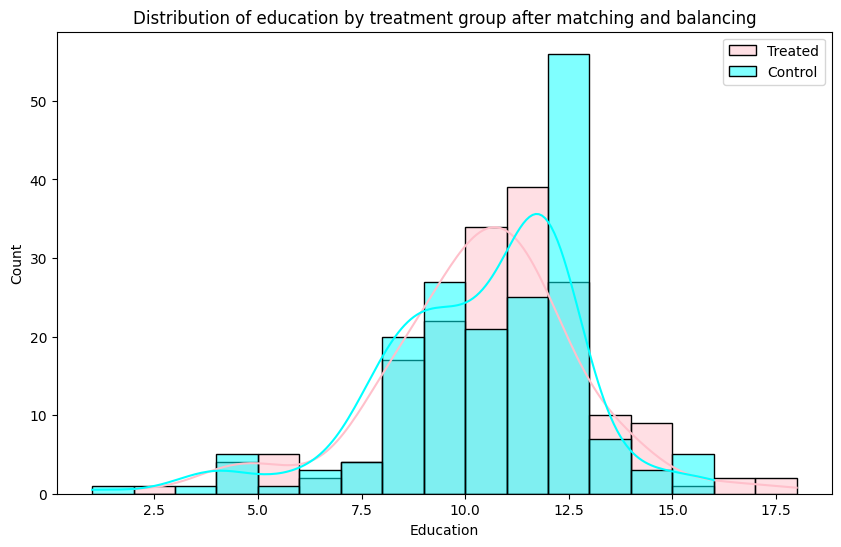

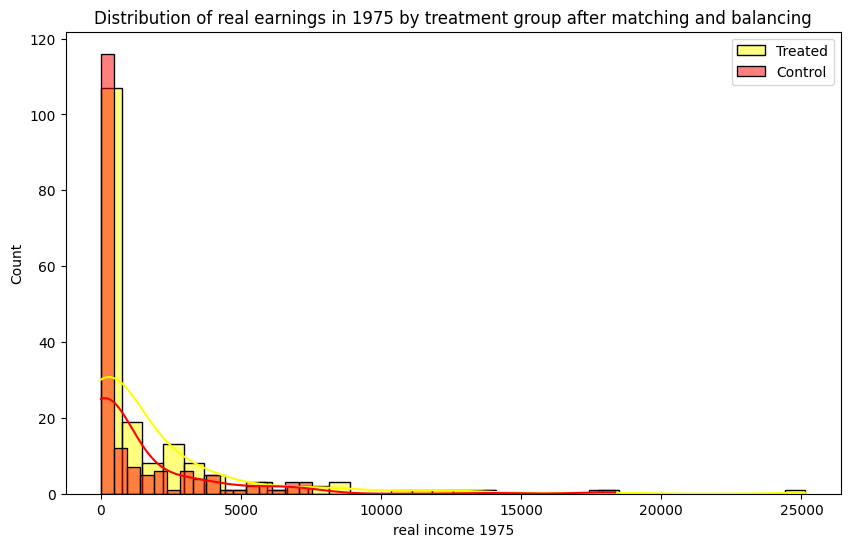

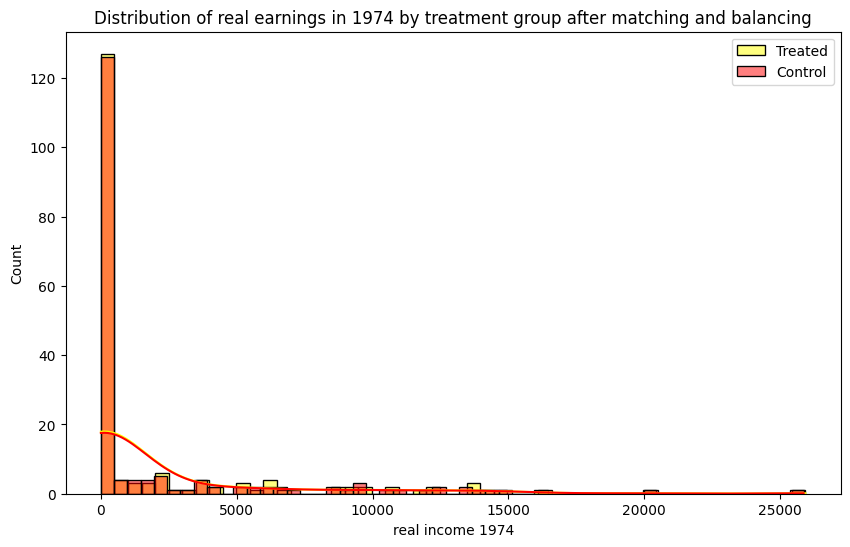

In [10]:
# Create a bipartite graph from the data
G = nx.Graph()

# Add nodes from the treated group
G.add_nodes_from(df[df["treat"] == 1].index, bipartite=0)

# Add nodes from the control group
G.add_nodes_from(df[df["treat"] == 0].index, bipartite=1)

# Add weighted edges based on the absolute difference of the propensity scores
# and the condition that the race of the treated and control subjects are equal
G.add_weighted_edges_from([(i, j, abs(pscores[i] - pscores[j])) 
                           for i in df[df["treat"] == 1].index 
                           for j in df[df["treat"] == 0].index
                           if abs(df["re74"][i] - df["re74"][j]) <= 200 ])

# Find the minimum weight matching in the bipartite graph
matching = nx.algorithms.matching.min_weight_matching(G)

# Create a new dataframe with the matched pairs
matched_df = pd.DataFrame(matching, columns=["treated", "control"])

# Merge the new dataframe with the original dataframe
matched_df = pd.merge(matched_df, df, left_on="treated", right_index=True)
matched_df = pd.merge(matched_df, df, left_on="control", right_index=True, suffixes=("_t", "_c"))

# Plot the histograms of age for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["age_t"], color="blue", label="Treated", kde=True)
sns.histplot(matched_df["age_c"], color="orange", label="Control", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of age by treatment group after matching and balancing")
plt.legend()
plt.show()


# Plot the histograms of educ for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["educ_t"], color="pink", label="Treated", kde=True)
sns.histplot(matched_df["educ_c"], color="cyan", label="Control", kde=True)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Distribution of education by treatment group after matching and balancing")
plt.legend()
plt.show()


# Plot the histograms of re75 for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["re75_t"], color="yellow", label="Treated", kde=True)
sns.histplot(matched_df["re75_c"], color="red", label="Control", kde=True)
plt.xlabel("real income 1975")
plt.ylabel("Count")
plt.title("Distribution of real earnings in 1975 by treatment group after matching and balancing")
plt.legend()
plt.show()

# Plot the histograms of re74 for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["re74_t"], color="yellow", label="Treated", kde=True)
sns.histplot(matched_df["re74_c"], color="red", label="Control", kde=True)
plt.xlabel("real income 1974")
plt.ylabel("Count")
plt.title("Distribution of real earnings in 1974 by treatment group after matching and balancing")
plt.legend()
plt.show()

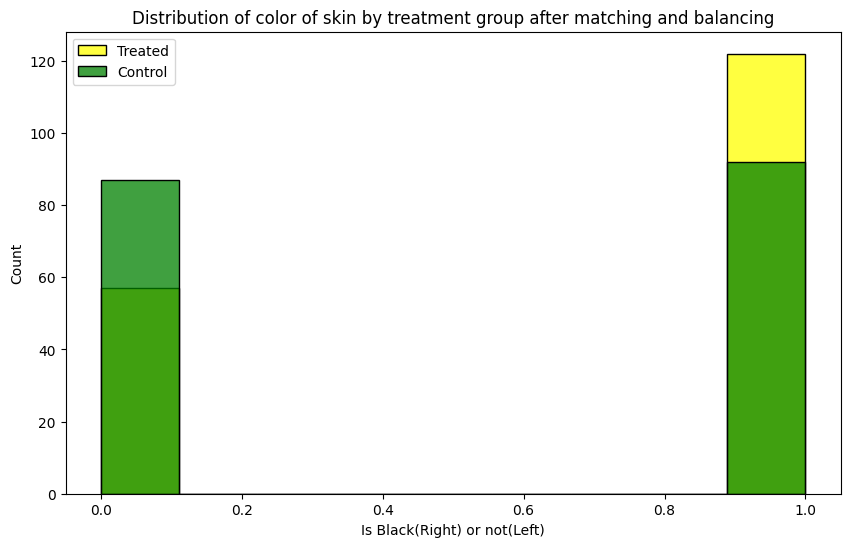

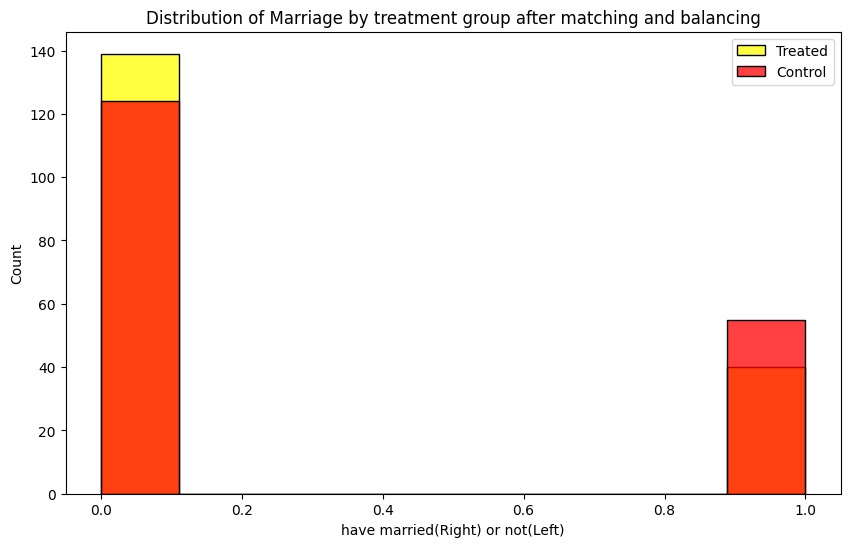

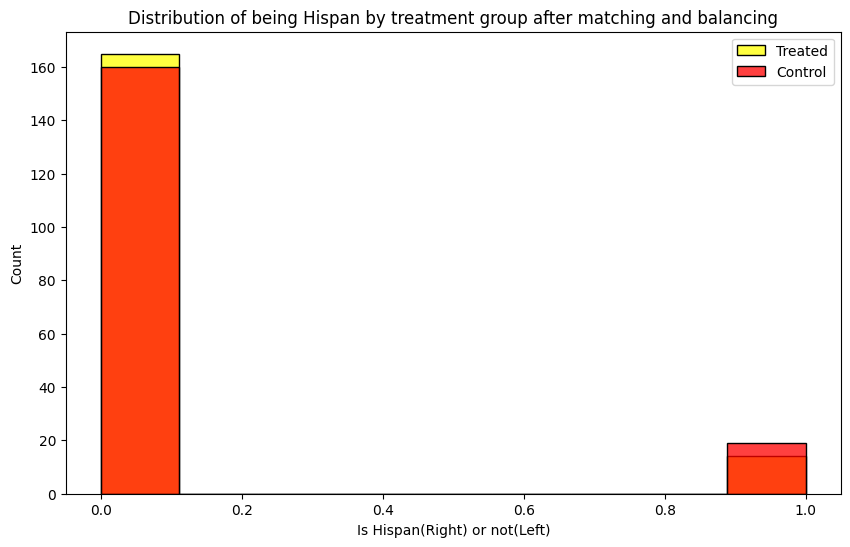

In [11]:
# Plot the histograms of age for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["black_t"], color="yellow", label="Treated")
sns.histplot(matched_df["black_c"], color="green", label="Control")
plt.xlabel("Is Black(Right) or not(Left)")
plt.ylabel("Count")
plt.title("Distribution of color of skin by treatment group after matching and balancing")
plt.legend()
plt.show()

# Plot the histograms of age for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["married_t"], color="yellow", label="Treated")
sns.histplot(matched_df["married_c"], color="red", label="Control")
plt.xlabel("have married(Right) or not(Left)")
plt.ylabel("Count")
plt.title("Distribution of Marriage by treatment group after matching and balancing")
plt.legend()
plt.show()


# Plot the histograms of age for each group
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["hispan_t"], color="yellow", label="Treated")
sns.histplot(matched_df["hispan_c"], color="red", label="Control")
plt.xlabel("Is Hispan(Right) or not(Left)")
plt.ylabel("Count")
plt.title("Distribution of being Hispan by treatment group after matching and balancing")
plt.legend()
plt.show()

As you can see, after balancing and using the explained condition, the distributions of features in two groups are much more similar and closer together.

### 1.6 A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


In [12]:
# Create a bipartite graph from the data
G = nx.Graph()

# Add nodes from the treated group
G.add_nodes_from(df[df["treat"] == 1].index, bipartite=0)

# Add nodes from the control group
G.add_nodes_from(df[df["treat"] == 0].index, bipartite=1)

# Add weighted edges based on the absolute difference of the propensity scores
# and the condition that the re74 of the treated and control subjects are equal
G.add_weighted_edges_from([(i, j, abs(pscores[i] - pscores[j])) 
                           for i in df[df["treat"] == 1].index 
                           for j in df[df["treat"] == 0].index
                           if abs(df["re74"][i] - df["re74"][j]) <= 200 ])

# Find the minimum weight matching in the bipartite graph
matching = nx.algorithms.matching.min_weight_matching(G)

# Create a new dataframe with the matched pairs
matched_df = pd.DataFrame(matching, columns=["treated", "control"])

# Add the outcome column for each group
matched_df["treated_re78"] = df["re78"][matched_df["treated"]].values
matched_df["control_re78"] = df["re78"][matched_df["control"]].values

matched_treat_stats = matched_df['treated_re78'].describe()
matched_control_stats = matched_df['control_re78'].describe()

# Print the summary statistics
print("Summary statistics of real earnings in 1978 for treated group after matching:")
print(matched_treat_stats)
print("\nSummary statistics of real earnings in 1978 for control group after matching:")
print(matched_control_stats)

Summary statistics of real earnings in 1978 for treated group after matching:
count      179.000000
mean      6313.568712
std       7939.593046
min          0.000000
25%          0.000000
50%       3892.332000
75%       9795.317500
max      60307.930000
Name: treated_re78, dtype: float64

Summary statistics of real earnings in 1978 for control group after matching:
count      179.000000
mean      5298.386463
std       6086.747360
min          0.000000
25%          0.000000
50%       3462.564000
75%       7946.188000
max      25564.670000
Name: control_re78, dtype: float64


Now, after balancing the groups, the 200 units difference in the outcome between the treatment and control group, has increased in more than 1000 units, which is incredible. The job training program resulted a much higher income in treatment group than the control group in average; And now, we are able to conclude the effectiveness of this treatment in real earnings of people and confidently say that if you get the job training program, you are likely to have a significant higher income after the training than before.

## 2 Applied Machine Learning with Scikit Learn

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project!  

2.1 Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency (as you will see later in the course), is of great help when it comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the 20newsgroup dataset
data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Extract the articles and the labels
X = data.data
y = data.target

# Compute TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)


2.2 Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'max_depth': None, 'n_estimators': 500}
Best score: 0.743766578249337
Accuracy: 0.773209549071618


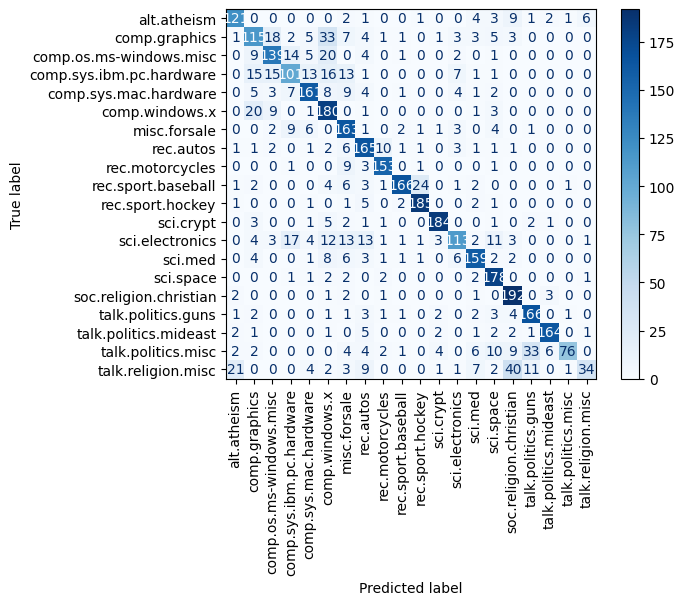

Top 10 most important features:
sale 0.004345464805367745
dod 0.003674758135669747
space 0.0032579830442078903
windows 0.0032008486920582263
car 0.002983695467892308
subject 0.002844201957964177
baseball 0.002688623766263038
bike 0.002677540496189583
organization 0.0026523795549250506
lines 0.0025477180712091124


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid for the random forest
param_grid = {'n_estimators': [10, 50, 100, 300, 500], 'max_depth': [None, 5, 10, 20]}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a grid search object
grid = GridSearchCV(rf, param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit the grid search on the validation set
grid.fit(X_val, y_val)

# Print the best parameters and the best score
print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)

# Use the best estimator to make predictions on the test set
y_pred = grid.best_estimator_.predict(X_test)

# Compute and print the accuracy score
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

# Plot the confusion matrix
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

# Get the feature importances
feature_importances = grid.best_estimator_.feature_importances_

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Sort the features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the top 10 most important features
print('Top 10 most important features:')
for i in range(10):
    print(feature_names[sorted_indices[i]], feature_importances[sorted_indices[i]])


As you can see, we can draw these conclutions from the results:

- The results indicate that a model was trained using cross-validation with 5 folds and 20 candidates, totaling 100 fits. The best parameters for the model were found to be a max depth of None and n_estimators of 500.(I guess increasing the n_estimator would also be slightly better in accuracy, but not efficient because of the low executing time of the code). This configuration yielded the best score of approximately 0.744 during training. When evaluated, the model achieved an accuracy of approximately 0.773.

- The accuracy score means that the model correctly predicted the news category for about 77% of the test articles. This is a decent performance, considering that there are 20 different categories to choose from. However, it can be also improve, as some categories might be more difficult to distinguish than others.

- The confusion matrix shows how well the model performed on each category, both as true labels and predicted labels. The diagonal line represents the cases where the model predicted the correct category. The darker the color, the higher the number of correct predictions. The off-diagonal cells represent the cases where the model predicted the wrong category. The lighter the color, the lower the number of incorrect predictions.

- From the confusion matrix, we can see that some categories are more easily classified than others. For example, the model did very well on 'sci.crypt', 'rec.sport.hockey', and 'talk.politics.mideast', as they have mostly dark colors on the diagonal and light colors on the off-diagonal. This means that the model rarely confused these categories with others. On the other hand, the model struggled with 'talk.religion.misc', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', and 'comp.sys.mac.hardware', as they have mostly light colors on the diagonal and dark colors on the off-diagonal. This means that the model often confused these categories with each other.

- The feature importances indicate how much each word contributes to the prediction of the news category. The higher the importance, the more informative the word is for the classification task. For example, the word 'sale' has a high importance because it is specific to the 'misc.forsale' category, while the word 'the' has a low importance because it is common in all categories.

- The top ten most important features contributing to the model's predictions include "sale," "dod," "space," "windows," "car," "subject," "baseball," "bike," "organization," and "lines." Each feature is associated with a specific importance score, indicating its contribution to the model's decision-making process. Some of these features are clearly related to certain categories, such as 'sale' for 'misc.forsale', 'space' for 'sci.space', and 'baseball' for 'rec.sport.baseball'. Others are more general, such as 'subject', 'organization', and 'lines', which might appear in the headers of the articles.

Now, if we want to improve the model's performance, we can use more features, such as n-grams, which are sequences of n words. This might capture more context and meaning from the articles, and reduce the ambiguity of some words. For example, the word 'windows' might refer to the operating system or the glass panes, depending on the context. Using n-grams might help the model distinguish between these meanings. Another possible way to improve the model's performance is to use a different classifier, such as a neural network, which might be able to learn more complex patterns and relationships from the data.

## 3 Regression (Only Numpy, Pandas, Matplotlib Allowed)

### 3.1 Reading Data and Preprocessing

In this section, we want to read data from `regression.csv` CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [52]:
import pandas as pd
data_frame = pd.read_csv('regression.csv')
X = data_frame.iloc[:, :8] # extract the first 8 columns as X
Y = data_frame.iloc[:, 8] # extract the 9th column as Y

print(f"dimestions of X are as {X.shape}")
print(f"dimestions of Y are as {Y.shape}")


dimestions of X are as (768, 8)
dimestions of Y are as (768,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

Briefly explain why we need to normalize our data before starting the training.

In [53]:
# Normalizing X and Y using mean and standard deviation
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_norm = (X - X_mean) / X_std

Y_mean = Y.mean(axis=0)
Y_std = Y.std(axis=0)

Y_norm = (Y - Y_mean) / Y_std

# Display the normalized matrices
print("Normalized X matrix:")
print(X_norm)

print("\nNormalized Y vector:")
print(Y_norm)

Normalized X matrix:
           X1        X2        X3        X4        X5        X6        X7  \
0    2.040447 -1.784712 -0.561586 -1.469119  0.999349 -1.340767 -1.759300   
1    2.040447 -1.784712 -0.561586 -1.469119  0.999349 -0.446922 -1.759300   
2    2.040447 -1.784712 -0.561586 -1.469119  0.999349  0.446922 -1.759300   
3    2.040447 -1.784712 -0.561586 -1.469119  0.999349  1.340767 -1.759300   
4    1.284142 -1.228438  0.000000 -1.197897  0.999349 -1.340767 -1.759300   
..        ...       ...       ...       ...       ...       ...       ...   
763 -1.173848  1.274794  0.561586  0.971879 -0.999349  1.340767  1.243239   
764 -1.362924  1.552931  1.123171  0.971879 -0.999349 -1.340767  1.243239   
765 -1.362924  1.552931  1.123171  0.971879 -0.999349 -0.446922  1.243239   
766 -1.362924  1.552931  1.123171  0.971879 -0.999349  0.446922  1.243239   
767 -1.362924  1.552931  1.123171  0.971879 -0.999349  1.340767  1.243239   

           X8  
0   -1.813393  
1   -1.813393  
2   -1

#### Explanations:

We need normalizing data before the training because of these purposes:

- **Scale Independence:** Normalizing ensures that all the features have the same scale. This is important because many machine learning algorithms, particularly those based on distance metrics (such as k-nearest neighbors) or optimization algorithms (such as gradient descent), perform better when features are on a similar scale. If the features have vastly different scales, the algorithm may give more weight to features with larger magnitudes, potentially leading to suboptimal performance.

- **Convergence Speed:** Normalizing the data can help the optimization algorithm converge faster during training. Gradient-based optimization algorithms, like gradient descent, often converge more quickly when the features are on a similar scale. This is because the learning rate, which determines the size of the steps taken during optimization, can be chosen more effectively when the features are normalized.

- **Numerical Stability:** Normalization can improve the numerical stability of the training process. Large input values can lead to numerical instability in some mathematical operations, especially when using floating-point precision. Normalizing the data helps mitigate this issue.

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [54]:
import numpy as np

# Add a column of 1s to X_norm for the bias term
X_bias = np.c_[np.ones(X_norm.shape[0]), X_norm]

# Display the new X matrix with the bias term
print("X matrix with bias term:")
print(X_bias)

X matrix with bias term:
[[ 1.          2.040447   -1.78471183 ... -1.34076704 -1.75930048
  -1.81339339]
 [ 1.          2.040447   -1.78471183 ... -0.44692235 -1.75930048
  -1.81339339]
 [ 1.          2.040447   -1.78471183 ...  0.44692235 -1.75930048
  -1.81339339]
 ...
 [ 1.         -1.36292406  1.55293107 ... -0.44692235  1.243239
   1.41041708]
 [ 1.         -1.36292406  1.55293107 ...  0.44692235  1.243239
   1.41041708]
 [ 1.         -1.36292406  1.55293107 ...  1.34076704  1.243239
   1.41041708]]


### 3.2 Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

In [55]:
def compute_loss(X, Y, w):    
    # Calculate the predicted values
    predictions = np.dot(X, w)
    
    # Compute the mean squared loss
    loss = np.mean((predictions - Y)**2)
    
    return loss

Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

What is the answer to this problem in terms of $X$ and $Y$?

To find the weight matrix $w$ that minimizes the mean squared loss function $\mathcal{L}(w)$, we can use the normal equation from linear algebra as below:
$$
X^T X w = X^T Y
$$

The solution for $w$ can be obtained by solving this system of linear equations:

$$
w = (X^T X)^{-1} X^T Y
$$

This formula provides the optimal values for the weights $w$ that minimize the mean squared loss. But, it's important to note that this method may not be suitable if $X^T X$ is singular or close to singular, as the inverse may not exist or be unstable.

Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

In [56]:
def calculate_weights(X, Y):
    # Calculate the weight matrix using the normal equation
    w = np.linalg.inv(X.T @ X) @ X.T @ Y

    return w

Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [87]:
# Calculate weights using the normal equation
weights = calculate_weights(X_bias, Y_norm)

# Compute the loss
loss = compute_loss(X_bias, Y_norm, weights)
print("Mean Squared Loss by Direct Method :", loss)


Mean Squared Loss by Direct Method : 0.10030835410477924


### 3.3 Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.
Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

The gradient of the mean squared loss $\mathcal{L}(\mathbf{w})$ with respect to the weight vector $\mathbf{w}$ is calculated as follows:

$$
\nabla \mathcal{L}(\mathbf{w}) = \frac{2}{m} \mathbf{X}^T (\mathbf{X}\mathbf{w} - \mathbf{y})
$$

In which:
- $m$ is the number of data points,
- $\mathbf{X}$ is the feature matrix with the bias term,
- $\mathbf{w}$ is the weight vector,
- $\mathbf{y}$ is the target vector.

The gradient represents the direction and magnitude of the steepest ascent of the loss function. The negative gradient is used in the update rule for gradient descent to move towards the minimum of the loss function. The factor $\frac{2}{m}$ is included to normalize the gradient with respect to the number of data points.

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.

In [58]:
import numpy as np

def compute_gradient(X, Y, w):
    
    m = len(Y)
    
    # Calculate the predicted values
    predictions = np.dot(X, w)
    
    # Compute the gradient
    gradient = (2 / m) * np.dot(X.T, predictions - Y)
    
    return gradient

Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [59]:
import numpy as np

def gradient_descent(X, Y, learning_rate, num_iterations):
    n = X.shape[1]
    w = np.random.randn(n, 1)  # Initialize weights with random values
    loss_history = np.zeros(num_iterations)

    for iteration in range(num_iterations):
        # Compute the gradient
        gradient = compute_gradient(X, Y, w)

        # Update the weight vector
        w = w - learning_rate * gradient

        # Compute and store the loss for this iteration
        loss_history[iteration] = compute_loss(X, Y, w)

    return w, loss_history

Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure. Discuss the effect of the learning rate and find the best value of this parameter.

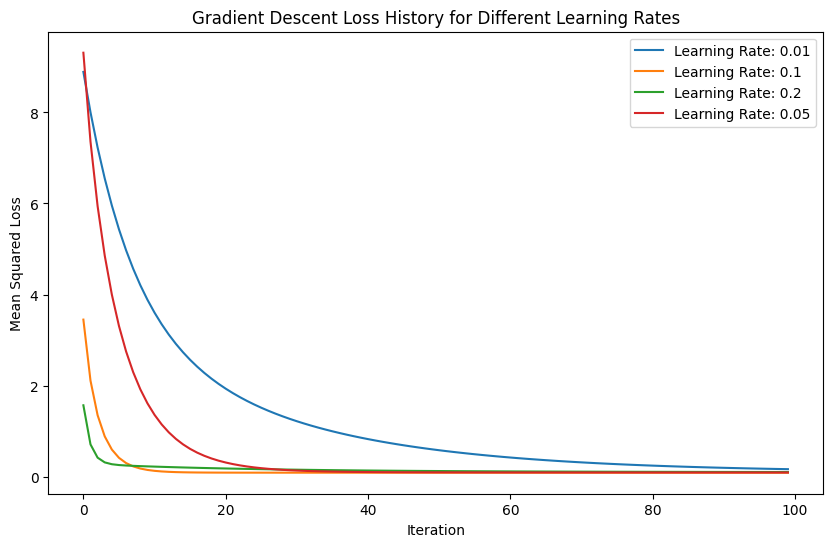

In [75]:
import matplotlib.pyplot as plt

num_iterations = 100

learning_rates = [0.01, 0.1, 0.2, 0.05]

plt.figure(figsize=(10, 6))

Y_norm_array = np.array(Y_norm)[np.newaxis]

for learning_rate in learning_rates:
    weights, loss_history = gradient_descent(X_bias, Y_norm_array.T, learning_rate, num_iterations)
    plt.plot(loss_history, label=f'Learning Rate: {learning_rate}')

plt.title('Gradient Descent Loss History for Different Learning Rates')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_19539/2354783886.py:6: RuntimeWarning: overflow encountered in square
  loss = np.mean((predictions - Y)**2)


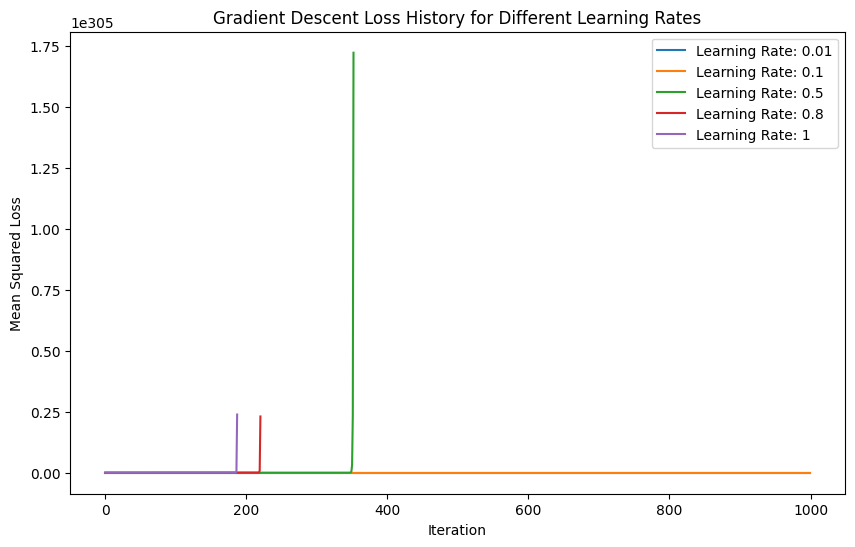

In [72]:
num_iterations = 1000

learning_rates = [0.01, 0.1, 0.5, 0.8, 1]

plt.figure(figsize=(10, 6))

Y_norm_array = np.array(Y_norm)[np.newaxis]

for learning_rate in learning_rates:
    weights, loss_history = gradient_descent(X_bias, Y_norm_array.T, learning_rate, num_iterations)
    plt.plot(loss_history, label=f'Learning Rate: {learning_rate}')

plt.title('Gradient Descent Loss History for Different Learning Rates')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Loss')
plt.legend()
plt.show()

As you can see, by analyzing the plot we will get insights into the effect of the learning rate:

- **Too Small Learning Rate (0.01, 0.05):** Convergence may be slow, and the algorithm may get stuck in local minima. As you can see, the convergence for $\alpha = 0.01$ determined after about 100 iterations which is too slow compared to larger values.

- **Moderate Learning Rate (0.1, 0.2):** This often works well, leading to a steady convergence. Here, also the best value which converged the fastest, was $\alpha = 0.1$.

- **Large Learning Rates (0.5, 0.8, 1.0):** Convergence might be fast initially, but there's a risk of overshooting the minimum. Larger learning rates might lead to oscillations or divergence. Here, according to second plot, you can see the divergence of larg learning rates as expected.

It's important to find a balance. If the learning rate is too small, the algorithm might take a long time to converge. If it's too large, it might overshoot the minimum or oscillate around it.

Based on the plot, as explained, I choose the learning rate of $\alpha_{optimal} = 0.1$. For this value of learning rate we have:

In [86]:
learning_rate = 0.1
num_iterations = 1000

_, loss_history = gradient_descent(X_bias, Y_norm_array.T, learning_rate, num_iterations)

print(f'Final Mean Squared Loss after convergence by Gradient Descent algorithm with learning rate of 0.1 : {loss_history[-1]}')

Final Mean Squared Loss after convergence by Gradient Descent algorithm with learning rate of 0.1 : 0.08562119226852329


### 3.4 Conclusion

Compare the answer of two different methods that we used earlier.

Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

### Direct Method (Normal Equation):

- **Pros:**
  - Provides a closed-form solution to the linear regression problem.
  - Requires no iterative optimization; the weights are calculated directly.
  - No need to manually choose a learning rate.

- **Cons:**
  - Computationally expensive for large datasets due to the matrix inversion operation $(X^T X)^{-1}$.
  - Not suitable for cases where $X^T X$ is close to singular (ill-conditioned matrices), leading to numerical instability.
  - Inverting a matrix has a cubic time complexity with respect to the number of features.

### Gradient Descent:

- **Pros:**
  - Can handle large datasets more efficiently as it processes data in small batches or one data point at a time.
  - Suitable for online learning scenarios where the model needs to be updated continuously.
  - More flexible and can be applied to various optimization problems beyond linear regression.

- **Cons:**
  - Requires the choice of a learning rate, which can impact convergence.
  - Convergence may be slower compared to the direct method, especially for well-conditioned problems.
  - Sensitive to feature scaling; normalization is often necessary.

### Comparison:

- **Numerical Stability:**
  - The direct method is prone to numerical instability if $X^T X$ is close to singular.
  - Gradient Descent can be more stable and is less affected by ill-conditioned matrices.

- **Computational Efficiency:**
  - For small to moderately sized datasets, the direct method can be computationally efficient.
  - Gradient Descent can be more scalable and efficient for large datasets.

- **Flexibility:**
  - The direct method is limited to linear regression problems and may not be easily adapted for more complex models.
  - Gradient Descent is a versatile optimization algorithm applicable to various machine learning models.

### Choosing the Method:

- **Direct Method:**
  - Suitable for small to moderately sized datasets with well-conditioned matrices.
  - When numerical stability is not an issue and computational resources allow.

- **Gradient Descent:**
  - Preferred for large datasets.
  - When computational efficiency is a concern.
  - In online learning scenarios.
  - When dealing with ill-conditioned matrices.

In our specific case, the mean squared loss values obtained from both methods are close but the Gradient Loss was a little lower, indicating that both methods provide reasonable solutions.

## 4 Classification (Only Numpy, Pandas, Matplotlib Allowed)
### 4.1 Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `Q4-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `Q4-valid.npy` file is your validation set, and the data in `Q4-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [13]:
import numpy as np

# Load training data
train_data = np.load('Q4-train.npy', allow_pickle=True)
X_train, Y_train = train_data[:, :-1], train_data[:, -1]

# Load validation data
valid_data = np.load('Q4-valid.npy', allow_pickle=True)
X_val, Y_val = valid_data[:, :-1], valid_data[:, -1]

# Load test data
test_data = np.load('Q4-test.npy', allow_pickle=True)
X_test, Y_test = test_data[:, :-1], test_data[:, -1]

To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [14]:
import numpy as np

def generate_polynomial_matrix(X, k):
    m = len(X)
    matrix = np.zeros((m, k+1))

    for i in range(k+1):
        matrix[:, i] = np.power(X.flatten(), i)

    return matrix

### 4.2 Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Part 3** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [15]:
import numpy as np

def train_polynomial_regression(X_train, Y_train, X_val, Y_val, k):
    # Generate the Vandermonde matrix for training and validation sets
    X_train_vandermond = generate_polynomial_matrix(X_train, k)
    X_val_vandermond = generate_polynomial_matrix(X_val, k)

    # Calculate the weight vector using ordinary least squares
    w = np.linalg.inv(X_train_vandermond.T @ X_train_vandermond) @ X_train_vandermond.T @ Y_train

    # Predictions on the training and validation sets
    Y_train_pred = X_train_vandermond @ w
    Y_val_pred = X_val_vandermond @ w

    # Training and validation losses (mean squared error)
    training_loss = np.mean((Y_train_pred - Y_train) ** 2)
    validation_loss = np.mean((Y_val_pred - Y_val) ** 2)

    return w, training_loss, validation_loss


In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot. Discuss about the effect of $k$.

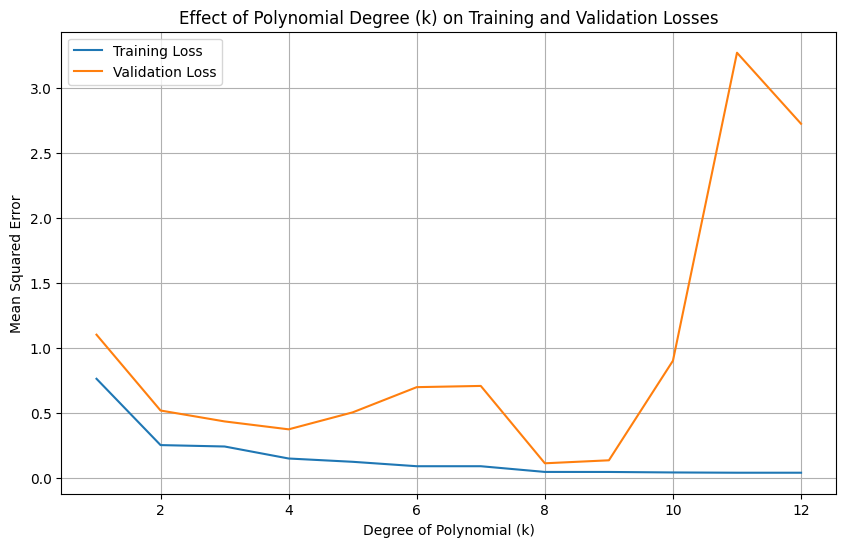

In [16]:
import matplotlib.pyplot as plt
import numpy as np

k_values = np.arange(1, 13)

# Arrays to store training and validation losses for each k
training_losses = []
validation_losses = []

for k in k_values:

    # Train polynomial regression model
    _, training_loss, validation_loss = train_polynomial_regression(X_train, Y_train, X_val, Y_val, k)

    # Append losses to arrays
    training_losses.append(training_loss)
    validation_losses.append(validation_loss)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, training_losses, label='Training Loss')
plt.plot(k_values, validation_losses, label='Validation Loss')
plt.xlabel('Degree of Polynomial (k)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Polynomial Degree (k) on Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()


As you can see, by low values of `k`, we have a significant MSE in the model, which shows the **Bias** of the model. This means that it doesn't record the complexityies of the data and don't capture the detailed information or features of that, resulting a Bias in detection of just general feature(s) of that because of **Underfitting**; As it gives a high value of MSE in both train and validation sets.

On the other hand, by increasing the value of `k`, the MSE value decreases (generally in validation set and continuously in training set) till we reach the minimum value of MSE in `k=8` in validation set. This is the best value of `k`. But after that, the MSE in training set continues to decrease a little bit, but we get a huge MSE in validation set. This shows the **Variance** of the model, indicating that the model records and captures all the complexity of the data and even its noisy or unwanted features, resulting a variance in detection of just this specific training data which probably doesn't work on other data. This is **Overfitting** of the model.

So, $k_{best} = 8$.

### 4.3 Evaluating Model

In the cell below find the loss of your best model on the test set. Why we need test set?

In [22]:
# Find the index (k_best) of the minimum validation loss and add 1 to get the value of k
k_best = np.argmin(validation_losses) + 1

# Train polynomial regression using the best k (k_best) on the training and validation sets
w_best, _, _ = train_polynomial_regression(X_train, Y_train, X_val, Y_val, k_best)

# Generate the polynomial matrix for the test set using the best k (k_best)
X_test_vandermond = generate_polynomial_matrix(X_test, k_best)

# Predictions on the training and validation sets
Y_test_pred = X_test_vandermond @ w_best

# Calculate the testing loss by applying the best model weights (w_best) on the test set
testing_loss = np.mean((Y_test_pred - Y_test) ** 2)

# Print the testing loss for the best model with the corresponding value of k
print(f'Loss of the best model with k = {k_best} on the test set: {testing_loss}')


Loss of the best model with k = 8 on the test set: 0.11791424797209027


## Bonus. CAT or PERSON: Data Sources and Introduction to Pytorch
The purpose of this exercise is two-fold. First, you create an image dataset inheriting from `torch.utils.data.Dataset` by collecting images from two webpages providing AI-generated images to the public. This helps you to understand how data needed for a data science task might come from various sources other than locally stored images, structured files (like CSV), relational databases, etc. Also, people sometimes need to create their custom dataset for their research purposes. In the second part, you will train a neural network on the data using the pytorch framework.


### 5.1 Installing Pytorch

Your job for this section is to install pytorch and the torchvision library. You may normally need torchvision in this exercise when handling images for converting images to torch tensors. For the sake of practicing, it might be good to try installing the libraries directly from your notebook. However, you can also do it from your system shell. Whatever you do, please share your work and the installation success message below. If executing shell commands for installation please share the screenshot of your terminal.

![alternative text](./Screenshot%20from%202023-12-28%2003-54-25.png)

### 5.2 Dataset
Take a look at [this interesting webpage](https://thisxdoesnotexist.com/) which shares AI-generated images and have some fun first! Well, we want to collect a dataset consisting of 50 images from [this url](https://thispersondoesnotexist.com/image) created by Phillip Wang and 50 images from [this one](https://thiscatdoesnotexist.com) created by Ryan Hoover. 
For creating the dataset you must inherit from `torch.utils.data.Dataset` and name your custom dataset class as `collected_2class_Dataset`

The `__init__()`, `__len__()` and `__getitem__()` methods of the class must be rewritten by you properly. 

The dataset must be designed in a way that by instantiation of the class, the data collection starts until all the samples are gathered. Your `__getitem__()` should also be coded in a way that `__getitem__(idx)` returns the data sample with the index `idx`. More precisely if your instance of `collected_2class_Dataset` is named `DS` and if:

`img, label = DS.__getitem__(someIndex)`, Then:

* `img` should be a torch tensor of size [1, 784] with data type float. The values must represent the scaled (to [0,1]) pixel values of the grayscale version of the images after being resized to 28x28.  
* `label` should be a torch tensor of a single element with data type long taking the value of 0 if the image is for a person and 1 if the image is related to a cat.

You might need to use additional packages like [Pillow](https://pypi.org/project/Pillow/) for image operations. Also, for requesting images from the websites you can follow different approaches. The simplest one might be running proper curl commands as shell commands from inside your python code. Use the following URLs for each resource to GET the images:
* https://thispersondoesnotexist.com/image
* https://thiscatdoesnotexist.com

Write code for your Dataset class definition and also any auxiliary functions if applicable. Please instantiate your class at the end of this code section.

In [49]:
import torch
import torch.utils.data as data
import requests
from PIL import Image, ImageFile 
from io import BytesIO
import numpy as np
from bs4 import BeautifulSoup
import random

# Define the URLs for each resource
PERSON_URL = "https://thispersondoesnotexist.com"

# Define the number of images to collect from each resource
NUM_IMAGES = 40

# Define a helper function to get an image from a URL and convert it to a torch tensor
def get_image_tensor(url):
  # Send a GET request to the URL and get the response
  response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
  # Check if the response status code is 200 (OK)
  if response.status_code == 200:
    # Read the response content as bytes
    content = response.content
    # Create a PIL image from the bytes
    image = Image.open(BytesIO(content))
    # Set the option to load truncated images
    ImageFile.LOAD_TRUNCATED_IMAGES = True # Add this line
    # Convert the image to grayscale and resize it to 28x28
    image = image.convert("L").resize((28, 28))
    # Convert the image to a numpy array and scale the values to [0, 1]
    array = np.array(image) / 255.0
    # Convert the numpy array to a torch tensor of shape [1, 784] and type float
    tensor = torch.from_numpy(array).view(1, -1).float()
    # Return the tensor
    return tensor
  else:
    # Raise an exception if the response status code is not 200
    raise Exception(f"Failed to get image from {url}")


# Define the custom dataset class that inherits from torch.utils.data.Dataset
class collected_2class_Dataset(data.Dataset):
  # Define the constructor method
  def __init__(self):
    # Initialize the parent class
    super(collected_2class_Dataset, self).__init__()
    # Initialize an empty list to store the images
    self.images = []
    # Initialize an empty list to store the labels
    self.labels = []
    # Get a list of image URLs from the cat website
    #cat_image_urls = get_cat_image_urls(2000)
    # Loop over the number of images to collect
    for i in range(NUM_IMAGES):
      # Get an image tensor from the person URL and append it to the images list
      self.images.append(get_image_tensor(PERSON_URL))
      # Append a label tensor of 0 (person) to the labels list
      self.labels.append(torch.tensor(0, dtype=torch.long))
      # Get a random image URL from the cat image URLs
      cat_image_url = "https://d2ph5fj80uercy.cloudfront.net/05/cat" + str(i) + ".jpg"
      # Get an image tensor from the cat image URL and append it to the images list
      self.images.append(get_image_tensor(cat_image_url))
      # Append a label tensor of 1 (cat) to the labels list
      self.labels.append(torch.tensor(1, dtype=torch.long))

  # Define the __len__ method to return the size of the dataset
  def __len__(self):
    return len(self.images)

  # Define the __getitem__ method to return the image and label tensors for a given index
  def __getitem__(self, index):
    return self.images[index], self.labels[index]

# Instantiate the dataset class
DS = collected_2class_Dataset()


### 5.3 Dataloader
Using `torch.utils.data.random_split` split your dataset to train/test with the proportion of 70/30. Based on `torch.utils.data.DataLoader` create a DataLoader for train data and one for test data. The choice of the batch size is up to you, but try to use rational values.

In [50]:
# Get the size of the dataset
dataset_size = len(DS)
# Compute the lengths of the train and test sets
train_size = int(0.7 * dataset_size)
test_size = dataset_size - train_size
# Split the dataset into train and test sets
train_dataset, test_dataset = torch.utils.data.random_split(DS, [train_size, test_size])

# Create a DataLoader for train data
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
# Create a DataLoader for test data
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

### 5.4 Training a Neural Network Classifier
Inheriting from `torch.nn.Module` create a neural network for classifying the input images to person/cat. Use 2 hidden layers. Employ relu as the non-linearity (activation function) for the both hidden layers and sigmoid for the output. The choice of the number of nodes in the hidden layers is up to you. Train your network with the `torch.nn.CrossEntropyLoss` loss as objective function and use `torch.optim.Adam` as optimizer. Use 10 epochs of learning. Report the accuracy of classification at the end of each learning epoch by printing the values. 

In [51]:
import torch
from torch import nn
from torch.utils.data import DataLoader

# Define the network class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the network layers
        self.input_layer = nn.Linear(784, 512)
        self.hidden_layer = nn.Linear(512, 512)
        self.output_layer = nn.Linear(512, 2)
        # Define the activation functions
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Implement the forward pass
        x = self.input_layer(x)
        x = self.relu(x)
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

# Create an instance of the network
model = NeuralNetwork()

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters())

# Define the number of epochs
epochs = 10

# Loop over the epochs
for epoch in range(epochs):
    # Initialize the running loss and accuracy
    running_loss = 0.0
    running_acc = 0.0
    # Loop over the batches of data
    for images, labels in train_loader:
        # Flatten the images
        images = images.view(-1, 784)
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(images)
        # Compute the loss
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        # Update the running loss and accuracy
        running_loss += loss.item()
        running_acc += (outputs.argmax(1) == labels).float().mean().item()
    # Compute the average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = running_acc / len(train_loader)
    # Print the results
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")


Epoch 1, Loss: 0.6914, Accuracy: 0.5000
Epoch 2, Loss: 0.6550, Accuracy: 0.4531
Epoch 3, Loss: 0.6651, Accuracy: 0.6094
Epoch 4, Loss: 0.5680, Accuracy: 0.7344
Epoch 5, Loss: 0.5427, Accuracy: 0.7188
Epoch 6, Loss: 0.4921, Accuracy: 0.8594
Epoch 7, Loss: 0.4419, Accuracy: 0.9062
Epoch 8, Loss: 0.4030, Accuracy: 0.9219
Epoch 9, Loss: 0.3720, Accuracy: 0.9531
Epoch 10, Loss: 0.3703, Accuracy: 0.9688


### 5.5 Testing the Trained Model
Examine the accuracy of your trained model on the test data prepared in section 3-5 and report the result.

In [53]:
# Set the model to evaluation mode
model.eval()
# Initialize the number of correct predictions and the total number of test images
correct = 0
total = 0
# Loop over the batches of test data
with torch.no_grad():
    for images, labels in test_loader:
        # Move the images and labels to the device
        # Flatten the images
        images = images.view(-1, 784)
        # Feed the images to the model and get the output logits
        logits = model(images)
        # Apply softmax to the logits and get the prediction probabilities
        pred_probab = nn.Softmax(dim=1)(logits)
        # Get the predicted labels for each image
        y_pred = pred_probab.argmax(1)
        # Compare the predicted labels with the true labels and count the correct predictions
        correct += (y_pred == labels).sum().item()
        # Update the total number of test images
        total += images.size(0)
# Compute the accuracy score
accuracy = correct / total
# Print the result
print(f"Accuracy of the test data: {accuracy:.4f}")


Accuracy of the test data: 0.8333


### 5.6 Is it Really Difficult to Distinguish Cats from Humans? 
Can you propose a rather simple rule-based system for doing this classification task? No code is needed for this part, just explain your ideas.

For example, a rule-based system for classifying images of cats and people could have a rule like this:

- If the image has whiskers and ears, then it is a cat.

The advantage of a rule-based system is that it is easy to understand and interpret, and it can handle complex logic and exceptions. The disadvantage is that it requires a lot of domain knowledge and manual effort to create and maintain the rules, and it may not generalize well to new or unseen data.

To design a simple rule-based system for this image classification task, we can use the following steps:

- First, we need to extract some features from the images, such as color, shape, texture, size, etc. We can use some image processing techniques, such as edge detection, segmentation, histogram, etc., to obtain these features. For example, we can use edge detection to find the contours of the objects in the images, and use histogram to find the dominant colors in the images.
- Second, we need to define some rules based on the features that can distinguish between cats and people. We can use some domain knowledge, such as the fact that cats have whiskers and ears, and people have eyes and noses, to create the rules. For example, we can have a rule like this:

  - If the image has more than two edges that are longer than 10 pixels, and the dominant color is brown or black, then it is a person.

- Third, we need to apply the rules to the images and classify them accordingly. We can use a simple algorithm, such as a decision tree, to implement the rules and make predictions. 

- Finally, we need to evaluate the performance of the rule-based system and refine the rules if necessary. We can use some metrics, such as accuracy, precision, recall, etc., to measure how well the system can classify the images. We can also use some methods, such as cross-validation, confusion matrix, etc., to check the robustness and reliability of the system.